In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_csv('data.csv', sep='~', encoding = 'utf-8', usecols=['ContingentUnit' ,'Start', 'End', 'EducatorAssignment', 'LocationsDisplayText', 'Subject'])
df.columns = ['Start', 'End', 'Номер группы', 'Преподаватель', 'Адрес', 'Предмет']
df['Предмет'].apply(str);
df['Вид занятия']=df['Предмет'].str.split(',').str.get(1)
df['Предмет']=df['Предмет'].str.split(',').str.get(0)
df['День'] = df['Start'].str.split(' ').str.get(0)
df['Время начала'] = df['Start'].str.split(' ').str.get(1)
df['Время окончания'] = df['End'].str.split(' ').str.get(1)
df = df[['Номер группы', 'Преподаватель', 'Адрес', 'Предмет', 'Вид занятия', 'День', 'Время начала', 'Время окончания']]
df.head()

,Номер группы,Преподаватель,Адрес,Предмет,Вид занятия,День,Время начала,Время окончания
0,2653BA9C-C524-46CD-BCE7-CCE24CA92DB9,724FF90E-ECFD-479F-91B0-5D6B60776DB8,"В.О., Университетская наб., д. 7-9-11, лит. А,...",Алгоритмы в биоинформатике,лекция,2018-09-29,10:50:00.000,12:30:00.000
1,2653BA9C-C524-46CD-BCE7-CCE24CA92DB9,724FF90E-ECFD-479F-91B0-5D6B60776DB8,"В.О., Университетская наб., д. 7-9-11, лит. А,...",Алгоритмы в биоинформатике,лекция,2018-09-22,10:50:00.000,12:30:00.000
2,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-05,10:30:00.000,12:00:00.000
3,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-19,10:30:00.000,12:00:00.000
4,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-26,10:30:00.000,12:00:00.000


# Список вариантов пар, на которые можно перенести занятие

In [11]:
# Пользователь вводит день и номер пары, которую хочет перенести
teacherName = input()
day = input()
number = input()

724FF90E-ECFD-479F-91B0-5D6B60776DB8
2018-09-22
10:50:00.000


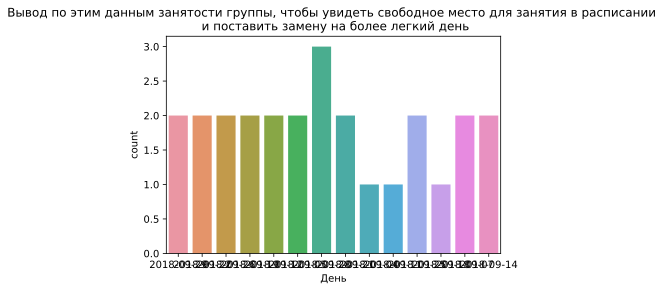

In [13]:
group = df[(df['День'] == day) & (df['Время начала'] == number) & (df['Преподаватель'] == teacherName)]['Номер группы'].item()
sns.countplot(df[df['Номер группы'] == group]['День']);
plt.title('Вывод по этим данным занятости группы, чтобы увидеть свободное место для занятия в расписании \n и поставить замену на более легкий день');

# Список свободных преподавателей на время определенной пары для замены


In [14]:
# При желании не перенести пару, а заменить себя другим преподавателем, пользователь может получить список свободных 
# преподавателей в это время
x = pd.unique(df[~(df['День'] == day) | ~(df['Время начала'] == number)]['Преподаватель'])
print(x)

['724FF90E-ECFD-479F-91B0-5D6B60776DB8'
 '7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E'
 'D8F9D802-AE63-4866-B6BD-36BC700CD898' ...
 'CEB707CE-2CB8-4E00-B9C8-8A3F83EA6CE7'
 'EB4A0196-38E6-4A10-A7DA-1AD4C8AC4422'
 '2D5D9501-96D0-4759-BD6F-C3D1FA078EF0']
